In [121]:
#-*- coding:utf-8 -*-

# pandas import 
import pandas as pd

# numpy import
import numpy as np

# Graph lib import 
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

# heatmap
import seaborn as sns

# 피어슨 상관계수 
import scipy.stats as stats

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False


# 각 열, 응답문항에 대하여 집계 한 데이터 return
def q13a_agg_col(col_name, agg_type, each_cnt, df, surfix):
    data = {}
    for i in range(1, each_cnt):
        col_idx = f'{i:02}'            # lpad 0, 2 length
        col_nm = col_name + col_idx 
        data[col_nm + '_' + surfix] = df[col_nm].groupby(df[col_nm]).agg(agg_type)
    return data

# cronbach alpha 
def cronbach_alpha(df):
    df_corr = df.corr()
    N = df.shape[1]
    rs = np.array([])
    for i, col in enumerate(df_corr.columns):
        sum_ = df_corr[col][i+1:].values
        rs = np.append(sum_, rs)
        mean_r = np.mean(rs)
    cronbach_alpha = (N * mean_r) / (1 + (N - 1) * mean_r)
    return cronbach_alpha


# 피어슨 상관계수를 구한뒤 dataFrame 으로 변환한다.
def pearson_frame(index_col, data_frame, each_cnt, col_list):
    data = {}
    for i in range(1, each_cnt):
        pear_val = stats.pearsonr(data_frame.corr()[index_col], data_frame.corr()[col_list[i-1]])
        data[col_list[i-1]] = pear_val
        
    res_data = pd.DataFrame.from_dict(data)
    res_data = res_data.rename(index={0 : '피어슨 상관계수 r', 1 : 'p-value'})
    return res_data

# raw data 5점 척도 변환

# one hot encoding 
def change_one_hot(origin_df, each_cnt, prefix):
    convert_df = origin_df
    for i in range(1, each_cnt):
        col_idx = f'{i:02}'
        col_nm = prefix + col_idx
        convert_df[col_nm] = convert_df[col_nm].apply(lambda x : 0 if x <= 3 else 1)
    return convert_df 


def change_one_hot_by_median(origin_df, each_cnt, prefix):
    convert_df = origin_df
    for i in range(1, each_cnt):
        col_idx = f'{i:02}'
        col_nm = prefix + col_idx
        
        # 중앙값 기준으로 -> 중앙값보다 작거나 같으면 0, 중앙값보다 크면 1 이다.
        this_median = convert_df[col_nm].mode()
        convert_df[col_nm] = convert_df[col_nm].apply(lambda x : 0 if x <= int(this_median) else 1)
    return convert_df


def change_one_hot_by_mode(origin_df, each_cnt, prefix):
    convert_df = origin_df
    for i in range(1, each_cnt):
        col_idx = f'{i:02}'
        col_nm = prefix + col_idx
        
        # 최빈값 기준으로 -> 최빈값보다 작으면 0, 최빈값보다 크면 1 이다.
        this_median = convert_df[col_nm].mode()
        convert_df[col_nm] = convert_df[col_nm].apply(lambda x : 0 if x < int(this_median) else 1)
    return convert_df


# view to heatmap
def view_to_heatmap(x_size, y_size, df_corr ):
    plt.figure(figsize=(x_size,y_size))


    # 삼각형 마스크를 만든다(위 쪽 삼각형에 True, 아래 삼각형에 False)
    mask = np.zeros_like(df_corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # 히트맵을 그린다
    sns.heatmap(df_corr, 
                cmap = 'RdYlBu_r', 
                annot = True,   # 실제 값을 표시한다
                mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
                linewidths=.5,  # 경계면 실선으로 구분하기
                cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
                vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
               )
    
    

In [53]:
# csv 파일을 읽어서 데이터 프레임으로 변환한다.

raw_data = pd.read_csv('./data/raw.csv')

In [54]:
"""
재방문 여부	q1
재방문 횟수	q1a
출입국 절차 만족	q13a01
대중교통 만족	q13a02
숙박 만족	q13a03
음식 만족	q13a04
쇼핑 만족	q13a05
관광지매력도 만족	q13a06
관광서비스 만족	q13a07
언어소통 만족	q13a08
여행경비 만족	q13a09
치안 만족	q13a10
재방문 의사	q14         q13a11
추천 의사	q15          q13a12
여행 전 한국 이미지	q16a   q13a13
여행 후 한국 이미지	q16b   q13a14
조사기간월	chasu 
거주국별	nat
거주도시	city
성별	sex
학력별	edu
직업별	job
연령별	age
"""

raw_data

,NO,q1,q1a,q13a01,q13a02,q13a03,q13a04,q13a05,q13a06,q13a07,...,q15,q16a,q16b,chasu,nat,city,sex,edu,job,age
0,1,2,3,3,5,4,5.0,3,3,4,...,3,4,4,12,12,1328,1,3,3,4
1,2,2,3,4,4,3,4.0,4,5,5,...,4,4,4,12,3,401,1,1,3,3
2,3,1,1,5,5,5,5.0,5,5,5,...,5,3,5,12,12,1304,1,1,99,2
3,4,1,1,4,4,4,5.0,4,3,4,...,4,4,5,12,3,401,1,2,8,1
4,5,2,3,3,4,5,5.0,5,4,4,...,5,4,4,12,3,401,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11990,11991,2,2,5,4,4,5.0,4,4,2,...,4,4,4,1,10,1001,1,2,12,2
11991,11992,2,2,5,5,5,3.0,4,4,5,...,4,4,4,1,15,5057,2,2,8,1
11992,11993,2,3,5,5,5,5.0,5,5,5,...,5,5,5,1,9,961,2,2,12,1
11993,11994,2,4,5,5,5,3.0,5,5,5,...,5,5,5,1,97,5350,1,2,2,2


In [61]:
# 데이터 변환시, 원본데이터 오염을 막기위해 DataFrame을 복사하여 처리한다.
statistics_df = raw_data.copy()

"""
5점 척도 데이터는 컬럼명을 q13aXX 로 변환하여 처리하도록 한다.
"""
statistics_df.columns = ['NO', 'q1' ,'q1a'
                         ,'q13a01' ,'q13a02' ,'q13a03','q13a04' ,'q13a05'
                         ,'q13a06' ,'q13a07' ,'q13a08','q13a09','q13a10' 
                         ,'q13a11' ,'q13a12' ,'q13a13','q13a14'
                         ,'chasu','nat','city','sex','edu','job','age']
statistics_df

,NO,q1,q1a,q13a01,q13a02,q13a03,q13a04,q13a05,q13a06,q13a07,...,q13a12,q13a13,q13a14,chasu,nat,city,sex,edu,job,age
0,1,2,3,3,5,4,5.0,3,3,4,...,3,4,4,12,12,1328,1,3,3,4
1,2,2,3,4,4,3,4.0,4,5,5,...,4,4,4,12,3,401,1,1,3,3
2,3,1,1,5,5,5,5.0,5,5,5,...,5,3,5,12,12,1304,1,1,99,2
3,4,1,1,4,4,4,5.0,4,3,4,...,4,4,5,12,3,401,1,2,8,1
4,5,2,3,3,4,5,5.0,5,4,4,...,5,4,4,12,3,401,2,2,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11990,11991,2,2,5,4,4,5.0,4,4,2,...,4,4,4,1,10,1001,1,2,12,2
11991,11992,2,2,5,5,5,3.0,4,4,5,...,4,4,4,1,15,5057,2,2,8,1
11992,11993,2,3,5,5,5,5.0,5,5,5,...,5,5,5,1,9,961,2,2,12,1
11993,11994,2,4,5,5,5,3.0,5,5,5,...,5,5,5,1,97,5350,1,2,2,2


In [56]:
# 요약정보 출력
statistics_df.describe()

,NO,q1,q1a,q13a01,q13a02,q13a03,q13a04,q13a05,q13a06,q13a07,...,q13a12,q13a13,q13a14,chasu,nat,city,sex,edu,job,age
count,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11994.000000,11995.000000,11995.000000,11995.000000,...,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000,11995.000000
mean,5998.000000,1.414256,1.901959,4.266611,4.353647,4.428429,4.319576,4.676782,4.490704,4.555732,...,4.303126,4.057024,4.355898,6.522718,10.554648,1289.207253,1.531221,2.187578,5.430346,1.975406
std,3462.802574,0.492614,1.216196,0.788834,0.715128,0.773568,0.726966,1.155635,0.993631,1.256747,...,0.674695,0.668935,0.635747,3.467140,20.348676,1797.088063,0.499045,0.808387,4.158589,1.245092
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2999.500000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,2.000000,212.000000,1.000000,2.000000,3.000000,1.000000
50%,5998.000000,1.000000,1.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,7.000000,5.000000,504.000000,2.000000,2.000000,5.000000,2.000000
75%,8996.500000,2.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,4.000000,5.000000,10.000000,10.000000,1143.000000,2.000000,2.000000,8.000000,3.000000
max,11995.000000,2.000000,4.000000,5.000000,5.000000,8.000000,5.000000,8.000000,8.000000,8.000000,...,5.000000,5.000000,5.000000,12.000000,97.000000,6499.000000,2.000000,9.000000,99.000000,9.000000


In [37]:
revisit_q13a_count = q13a_agg_col('q13a', 'count', 15, statistics_df.copy(), 'fq')

revisit_fq_df = pd.DataFrame(revisit_q13a_count)
revisit_fq_df = revisit_fq_df.drop(8, axis=0)

revisit_fq_df.columns = ["출입국 절차 만족", "숙박 만족", 
                         "대중교통 만족", "쇼핑 만족", "음식 만족",
                         "관광지매력도 만족", "관광서비스 만족", "언어소통 만족",
                         "여행경비 만족", "치안 만족" , "재방문 의사", "추천의사", "여행전 한국이미지", "여행후 한국이미지"]

revisit_fq_df

,출입국 절차 만족,숙박 만족,대중교통 만족,쇼핑 만족,음식 만족,관광지매력도 만족,관광서비스 만족,언어소통 만족,여행경비 만족,치안 만족,재방문 의사,추천의사,여행전 한국이미지,여행후 한국이미지
1.0,94.0,15.0,14,25.0,8,11,23,137.0,26.0,5.0,60.0,7.0,8.0,7.0
2.0,229.0,118.0,64,142.0,37,58,127,714.0,236.0,29.0,311.0,107.0,57.0,62.0
3.0,1308.0,1252.0,944,1289.0,826,1164,1514,3390.0,2618.0,843.0,1438.0,1100.0,2142.0,821.0
4.0,5118.0,4835.0,5170,5057.0,4938,5072,4807,4865.0,5464.0,4516.0,5128.0,5810.0,6824.0,5870.0
5.0,5246.0,5775.0,5653,5481.0,5234,5187,4531,2889.0,3651.0,6602.0,5058.0,4971.0,2964.0,5235.0


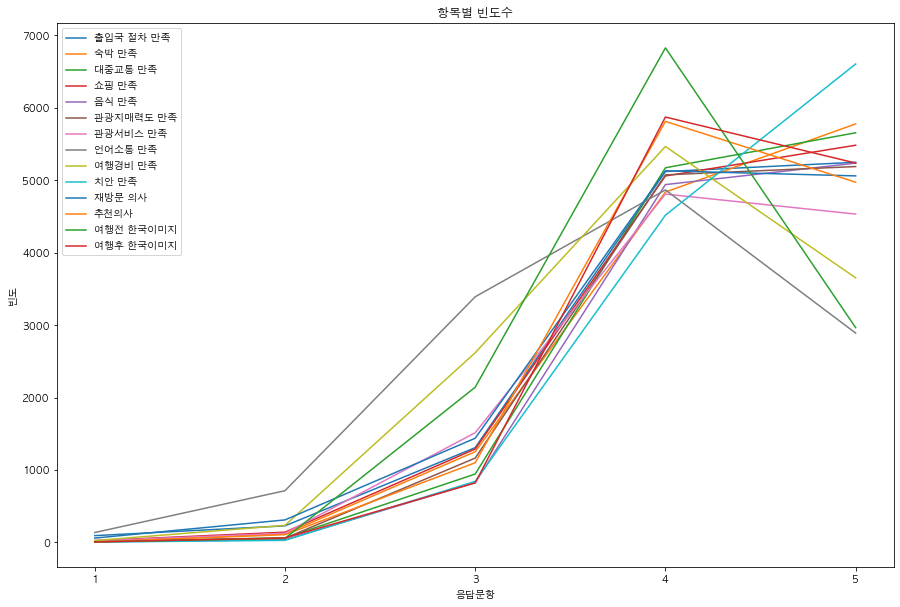

In [57]:
revisit_fq_df.plot(figsize=(15,10))
plt.title("항목별 빈도수")
plt.xlabel("응답문항")
plt.ylabel("빈도")
plt.xticks(range(1,6,1))
plt.show()

In [48]:
# q13a11 => 재방문 의사 5점 척도
select_p = statistics_df.copy().iloc[:, [3,4,5,6,7,8,9,10,11,12,13]]

select_p.columns = ["출입국 절차 만족", "숙박 만족", 
                    "대중교통 만족", "쇼핑 만족", "음식 만족",
                    "관광지매력도 만족", "관광서비스 만족", "언어소통 만족",
                    "여행경비 만족", "치안 만족" , "재방문 의사"]

select_p.corr()

,출입국 절차 만족,숙박 만족,대중교통 만족,쇼핑 만족,음식 만족,관광지매력도 만족,관광서비스 만족,언어소통 만족,여행경비 만족,치안 만족,재방문 의사
출입국 절차 만족,1.000000,0.504437,0.323118,0.270493,0.192125,0.198354,0.161791,0.311585,0.396649,0.453267,0.197697
숙박 만족,0.504437,1.000000,0.429928,0.337404,0.234570,0.234368,0.213702,0.314671,0.397079,0.531891,0.243635
대중교통 만족,0.323118,0.429928,1.000000,0.385748,0.253308,0.229119,0.221872,0.292438,0.349534,0.394314,0.212553
쇼핑 만족,0.270493,0.337404,0.385748,1.000000,0.261588,0.259059,0.223841,0.355646,0.406436,0.334163,0.318689
음식 만족,0.192125,0.234570,0.253308,0.261588,1.000000,0.319949,0.375477,0.168783,0.215367,0.261679,0.178685
관광지매력도 만족,0.198354,0.234368,0.229119,0.259059,0.319949,1.000000,0.598431,0.191462,0.219652,0.237075,0.199223
관광서비스 만족,0.161791,0.213702,0.221872,0.223841,0.375477,0.598431,1.000000,0.224004,0.225393,0.234538,0.162820
언어소통 만족,0.311585,0.314671,0.292438,0.355646,0.168783,0.191462,0.224004,1.000000,0.552467,0.337307,0.230136
여행경비 만족,0.396649,0.397079,0.349534,0.406436,0.215367,0.219652,0.225393,0.552467,1.000000,0.484493,0.262761
치안 만족,0.453267,0.531891,0.394314,0.334163,0.261679,0.237075,0.234538,0.337307,0.484493,1.000000,0.241679


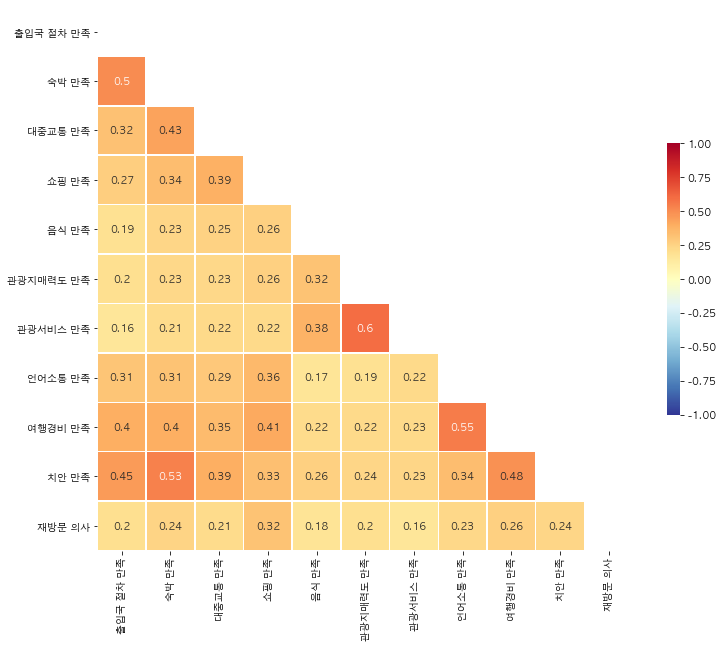

In [52]:
view_to_heatmap(12,10, select_p.corr())

In [118]:
col_list_p = ["출입국 절차 만족", "숙박 만족", 
                    "대중교통 만족", "쇼핑 만족", "음식 만족",
                    "관광지매력도 만족", "관광서비스 만족", "언어소통 만족",
                    "여행경비 만족", "치안 만족" , "재방문 의사"]

pearson_by_revisit_at = pearson_frame('재방문 의사', select_p, 11, col_list_p)

pearson_by_revisit_at

# 피어슨 상관계수를 구한뒤 값으로 출력
# p-value 가 0.05 이하이면, 귀무가설을 기각하고 대립가설을 채택한다.

# 재방문 의사에 대한 피어슨 상관계수
# 전체 데이터 기준으로 재방문의사에 대한 상관관계는 유의미한 결과로 나오지 않는다.

,출입국 절차 만족,숙박 만족,대중교통 만족,쇼핑 만족,음식 만족,관광지매력도 만족,관광서비스 만족,언어소통 만족,여행경비 만족,치안 만족
피어슨 상관계수 r,-0.219969,-0.179728,-0.209179,0.064876,-0.266050,-0.251620,-0.319847,-0.123446,-0.119325,-0.192953
p-value,0.515746,0.596948,0.537047,0.849694,0.429084,0.455439,0.337634,0.717644,0.726753,0.569741


In [131]:
# 이하, cutoff 기준 특성 변경으로 분석

# one-hot-encoding (서열척도 -> 0,1 의 특성으로 변경)

statistics_df_one = raw_data.copy()

# 컬럼명 변경 서열척도는 q13aXX 
statistics_df_one.columns = ['NO', 'q1' ,'q1a'
                         ,'q13a01' ,'q13a02' ,'q13a03','q13a04' ,'q13a05'
                         ,'q13a06' ,'q13a07' ,'q13a08','q13a09','q13a10' 
                         ,'q13a11' ,'q13a12' ,'q13a13','q13a14'
                         ,'chasu','nat','city','sex','edu','job','age']

# 최빈값 기준으로 작으면 0, 크거나 같으면 1 을 반환하는 함수 호출
convert_by_mode = change_one_hot_by_mode(statistics_df_one, 12,'q13a' )

In [132]:
converted_df_by_mode = convert_by_mode.iloc[:,3:14]

converted_df_by_mode

,q13a01,q13a02,q13a03,q13a04,q13a05,q13a06,q13a07,q13a08,q13a09,q13a10,q13a11
0,0,1,0,1,0,0,1,0,0,1,0
1,0,0,0,0,0,1,1,0,0,1,1
2,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,1,0,0,1,0,1,0,1
4,0,0,1,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
11990,1,0,0,1,0,0,0,0,0,1,1
11991,1,1,1,0,0,0,1,0,1,1,1
11992,1,1,1,1,1,1,1,1,1,1,1
11993,1,1,1,0,1,1,1,0,0,1,1


In [136]:
converted_df_by_mode.columns = ["출입국 절차 만족", "숙박 만족", 
                            "대중교통 만족", "쇼핑 만족", "음식 만족",
                            "관광지매력도 만족", "관광서비스 만족", "언어소통 만족",
                            "여행경비 만족", "치안 만족" , "재방문 의사"]

converted_df_by_mode

,출입국 절차 만족,숙박 만족,대중교통 만족,쇼핑 만족,음식 만족,관광지매력도 만족,관광서비스 만족,언어소통 만족,여행경비 만족,치안 만족,재방문 의사
0,0,1,0,1,0,0,1,0,0,1,0
1,0,0,0,0,0,1,1,0,0,1,1
2,1,1,1,1,1,1,1,1,1,1,1
3,0,0,0,1,0,0,1,0,1,0,1
4,0,0,1,1,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
11990,1,0,0,1,0,0,0,0,0,1,1
11991,1,1,1,0,0,0,1,0,1,1,1
11992,1,1,1,1,1,1,1,1,1,1,1
11993,1,1,1,0,1,1,1,0,0,1,1


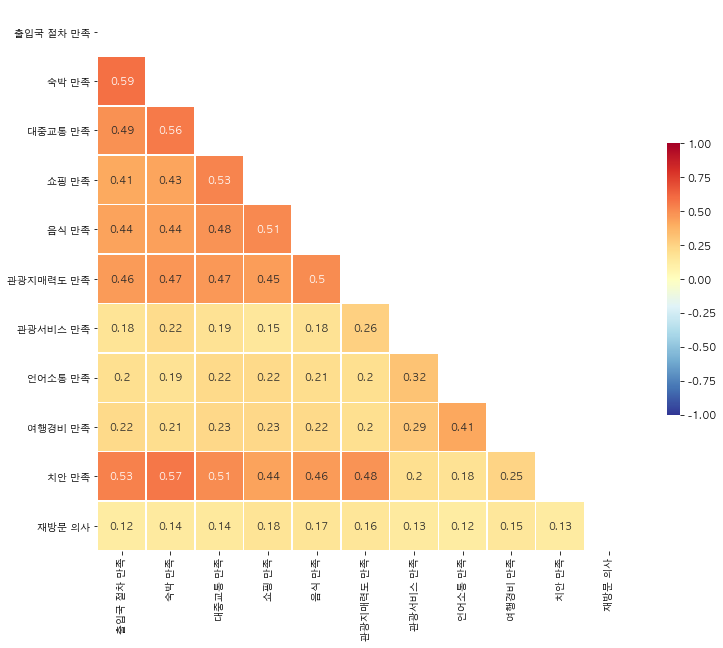

In [137]:
# 상관관계 heatmap 
view_to_heatmap(12,10, converted_df_by_mode.corr())

In [139]:
pearson_by_revisit_at = pearson_frame('재방문 의사', converted_df_by_mode, 11, col_list_p)
pearson_by_revisit_at

,출입국 절차 만족,숙박 만족,대중교통 만족,쇼핑 만족,음식 만족,관광지매력도 만족,관광서비스 만족,언어소통 만족,여행경비 만족,치안 만족
피어슨 상관계수 r,-0.417402,-0.401034,-0.390964,-0.283928,-0.319435,-0.342862,-0.218170,-0.263062,-0.216103,-0.409197
p-value,0.201498,0.221562,0.234469,0.397477,0.338292,0.301972,0.519271,0.434480,0.523335,0.211415


In [143]:
"""
전체 데이터를 기준으로 상관관계를 분석하였을 때, 유의미한 상관관계가 나타나지 않았다.
다중공선성 문제는 없다. -> 회귀분석이 가능하다.

다중공선성(多重公線性)문제(Multicollinearity)는 통계학의 회귀분석에서 독립변수들 간에 강한 상관관계가 나타나는 문제이다
"""
print('==='*30)